# Business overview
About Pens and Printers
Pens and Printers was founded in 1984 and provides high quality office products to large organizations. We are a trusted provider of everything from pens and notebooks to desk chairs and monitors. We don’t produce our own products but sell those made by other companies.

# New Product Sales Methods
Six weeks ago we launched a new line of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens and sticky notes. Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two.
Email: Customers in this group received an email when the product line was launched, and a further email three weeks later. This required very little work for the team.
Call: Customers in this group were called by a member of the sales team. On average members of the team were on the phone for around thirty minutes per customer.
Email and call: Customers in this group were first sent the product information email, then called a week later by the sales team to talk about their needs and how this new product may support their work. The email required little work from the team, the call was around ten minutes per customer.

# Business goals
Launching a new product line is expensive and company need to make sure company are using the best techniques to sell the new product effectively.

In [ ]:
# import libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# DATA VALIDATION

In [ ]:
# overview information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,95.578993,4.965933,24.990867
std,1.656420,1.812213,47.956792,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.650000,1.000000,23.000000
50%,3.000000,10.000000,90.950000,3.000000,25.000000
75%,5.000000,11.000000,107.750000,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


**The dataset has 15000 rows and 8 columns, where the data types of the columns are correct.**

In [ ]:
# check how many missing value in the dataset
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

**The revenue column has 1074 missing values.**

In [ ]:
# Check if it has duplicated value
print(df.duplicated().sum())
print(df['customer_id'].duplicated().sum())

0
0


**It shows dataset don't have duplicated value, as well as in customer_id column**

In [ ]:
# Check state column
df['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

**State column is correct.**

In [ ]:
# check how many categories in sales_method
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

**Email, Call. Email + Call are correct. we need convert em+call to Email+Call and email to Email.**

In [ ]:
# replace the incorrect value in sales_method
df['sales_method'].replace('email','Email', inplace=True)
df['sales_method'].replace('em + call','Email + Call', inplace=True)
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

<Axes: xlabel='sales_method', ylabel='revenue'>

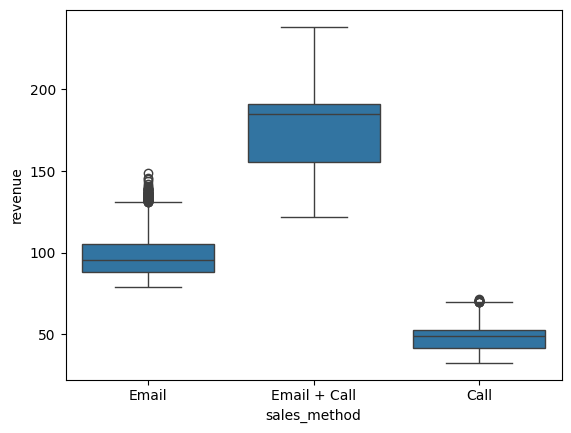

In [ ]:
# Take a look at revenue on each method
sns.boxplot(data=df, x='sales_method',y='revenue')

**Since revenue varies a lot from from method on method. I dicided to fill null value based on average value of each method.**

In [ ]:
# Find average value of each sales method
group_mean = df.groupby('sales_method')['revenue'].mean()

# fillna value based on mean value of each group
for group, mean_value in group_mean.items():
    df.loc[df['sales_method']==group,'revenue'] = df.loc[df['sales_method']==group,'revenue'].fillna(mean_value)

In [ ]:
# check value again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


**The dataset looks good to move forward now.**

# DATA VISUALIZATION

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


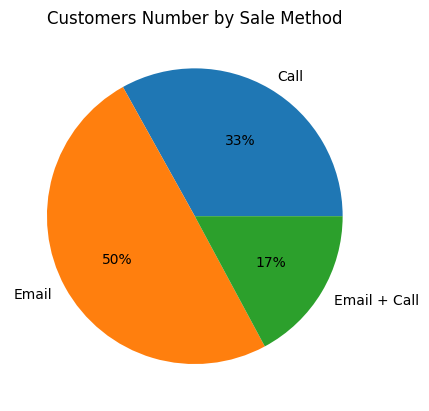

In [ ]:
# How many customers were there for each approach?
Customers = df.groupby('sales_method')['customer_id'].count()
print(Customers)
Customers.plot(kind='pie',autopct='%1.0f%%')
plt.title('Customers Number by Sale Method')
plt.ylabel('')
plt.show()

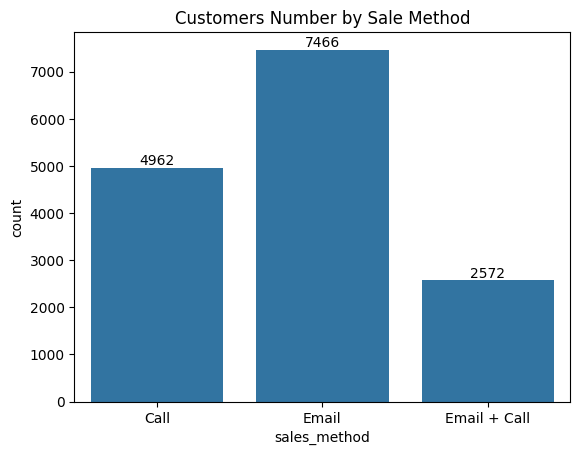

In [ ]:
# barchat for each method
sns.countplot(data=df, x='sales_method',order=['Call','Email','Email + Call'])
for index, value in enumerate(Customers):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('Customers Number by Sale Method')
plt.show()

**We can see from above chart. Call method has 4962 customer for 33%, Email method has 7466 customer for 50%, Email+Call has 2572 method for 17%. The Email customer accounts for half, has the largest number of customers.**

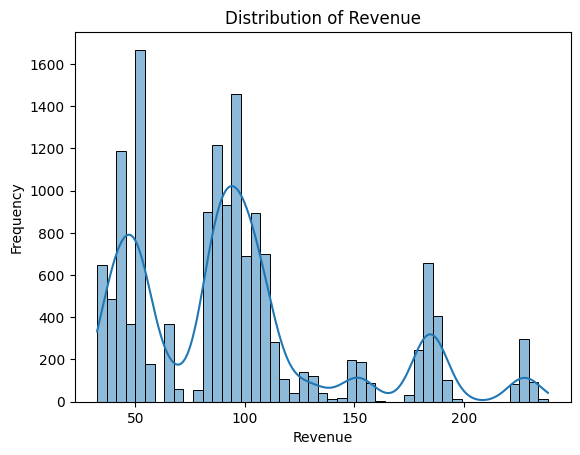

In [ ]:
# check the distribution of revenue
sns.histplot(df['revenue'],kde=True)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

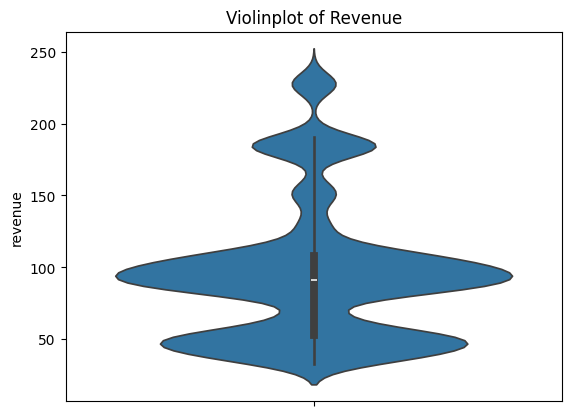

In [ ]:
# use violinplot to see the distribution
sns.violinplot(df['revenue'])
plt.title('Violinplot of Revenue')
plt.show()

As we can see, the most value of revenue are between 30 and 120. And the most frequency value of revenue is around 80 and 120. But in order to get more detail of revenue, we need to see distribution on each method.

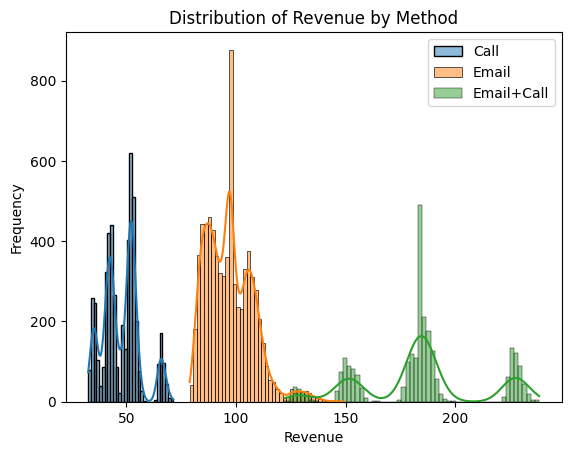

In [ ]:
# What does the spread of the revenue look like for each method?
sns.histplot(df[df['sales_method']=='Call']['revenue'],kde=True,label='Call')
sns.histplot(df[df['sales_method']=='Email']['revenue'],kde=True,label='Email')
sns.histplot(df[df['sales_method']=='Email + Call']['revenue'],kde=True,label='Email+Call')
plt.legend()
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue by Method')
plt.show()

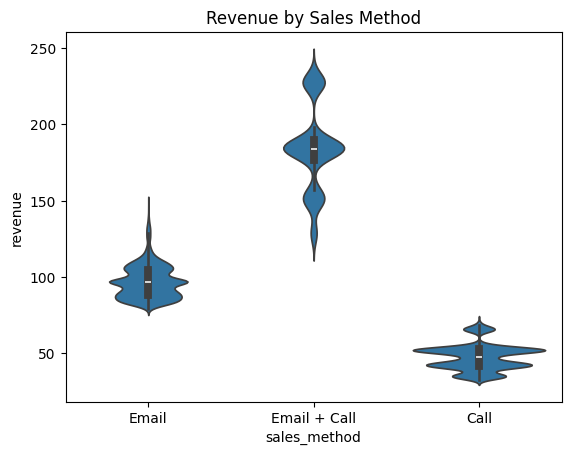

In [ ]:
# Use violinplot to see the spread of the revenue look like for each method
sns.violinplot(data=df, y='revenue',x='sales_method')
plt.title('Revenue by Sales Method')
plt.show()

**Based on the histplot and violinplot, it can be seen that three methods have different range, just a little overlap of them. The call method is lowest and Email+call is highest.**

sales_method
Call            236178.631537
Email           725155.290202
Email + Call    472350.970166
Name: revenue, dtype: float64


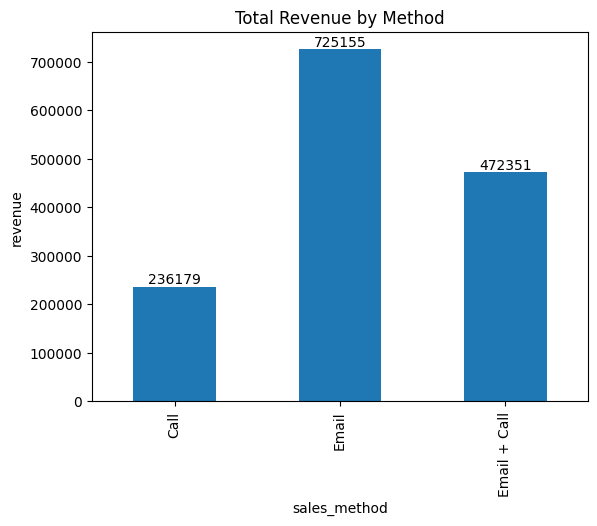

In [ ]:
# Total number of revenue for each method.
Mean_revenue = df.groupby('sales_method')['revenue'].sum()
print(Mean_revenue)
cx = Mean_revenue.plot(kind='bar')
cx.bar_label(cx.containers[0])
plt.ylabel('revenue')
plt.title('Total Revenue by Method')
plt.show()

**The Email method has largest total revenue, this methods were used for the majority of customer**

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


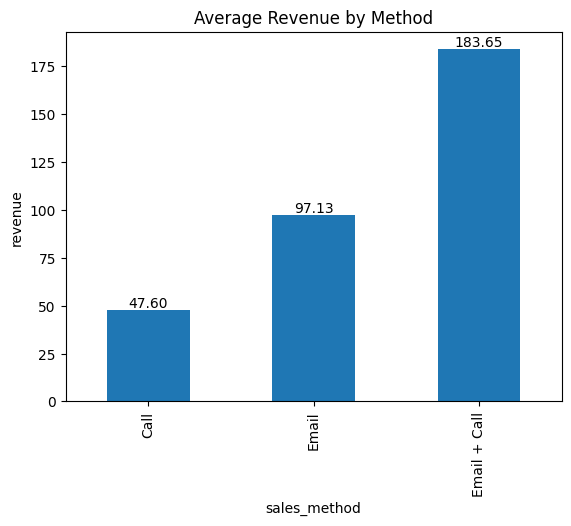

In [ ]:
# Average revenue for each method.
Mean_revenue = df.groupby('sales_method')['revenue'].mean()
print(Mean_revenue)
cx = Mean_revenue.plot(kind='bar')
cx.bar_label(cx.containers[0], fmt='%.02f')
plt.ylabel('revenue')
plt.title('Average Revenue by Method')
plt.show()

**Email method used for the majority of customers. But the average revenue for this method is 97.13. while Email+Call method only used for 17% customers, but the average revenue is reach to 183.65.**

week  sales_method
1     Call             27015.934407
      Email           248122.682313
      Email + Call     20007.400954
2     Call             35219.944012
      Email           148478.487577
      Email + Call     31702.115744
3     Call             37865.583880
      Email           107047.993157
      Email + Call     55164.933140
4     Call             51545.486149
      Email           116044.223157
      Email + Call     89682.576419
5     Call             55279.216281
      Email            80201.111052
      Email + Call    147195.006815
6     Call             29252.466808
      Email            25260.792947
      Email + Call    128598.937094
Name: revenue, dtype: float64


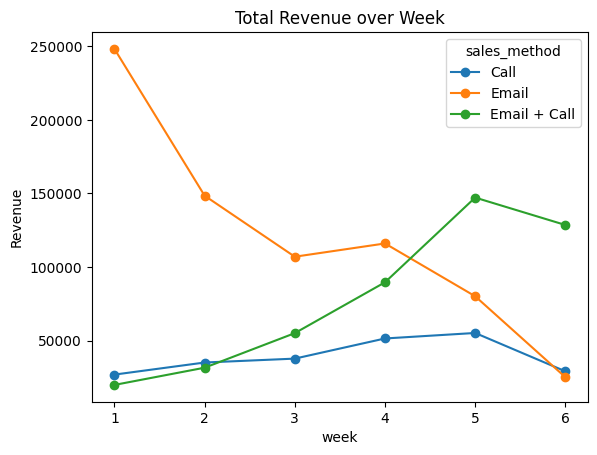

In [141]:
# Was there any difference in revenue over time for each of the methods?
cx = df.groupby(['week','sales_method'])['revenue'].sum()
print(cx)
cx.unstack().plot(marker='o')
plt.title('Total Revenue over Week')
plt.ylabel('Revenue')
plt.show()

**It can be seen that at the very begining of week, Email method has the highest value than other methods. But as time going, the total revenue for Email is descrese. while the Email+Call method is increase over week. The Call method didn't have any good performance.**

In [ ]:
# the other way to check the total revenue over week.
# sns.barplot(data=df, x='week', y='revenue', hue='sales_method', estimator='sum', errorbar=None)
# plt.title('Revenue over time for each method')
# plt.show()

week  sales_method
1     Call             35.641074
      Email            88.143049
      Email + Call    135.185142
2     Call             43.751483
      Email            99.918229
      Email + Call    158.510579
3     Call             41.979583
      Email            93.085211
      Email + Call    153.662766
4     Call             51.289041
      Email           107.948115
      Email + Call    181.176922
5     Call             52.949441
      Email           107.942276
      Email + Call    187.033046
6     Call             65.295685
      Email           128.227375
      Email + Call    220.581367
Name: revenue, dtype: float64


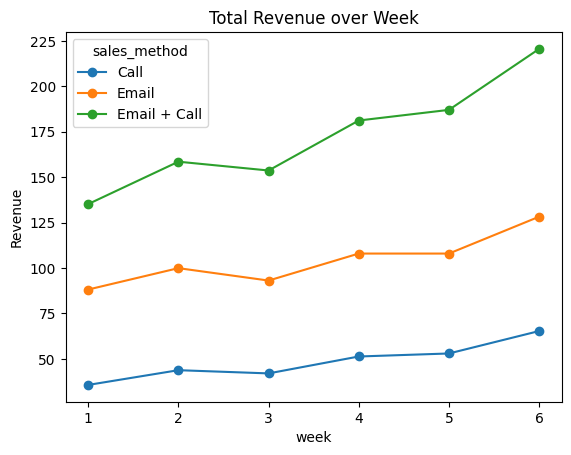

In [138]:
# Was there any difference in revenue over time for each of the methods?
cx = df.groupby(['week','sales_method'])['revenue'].mean()
print(cx)
cx.unstack().plot(marker='o')
plt.title('Total Revenue over Week')
plt.ylabel('Revenue')
plt.show()

**It can be seen that the average revenue on three methods are increased over week. But the most valuable method is difinitely Email+Call due to it has highest value than other two method.**

In [ ]:
# the other way to check the average revenue over week.
# sns.barplot(data=df, x='week', y='revenue', hue='sales_method',errorbar=None)
# plt.title('Revenue over time for each method')
# plt.show()

week
1    295146.017674
2    215400.547333
3    200078.510176
4    257272.285725
5    282675.334148
6    183112.196849
Name: revenue, dtype: float64


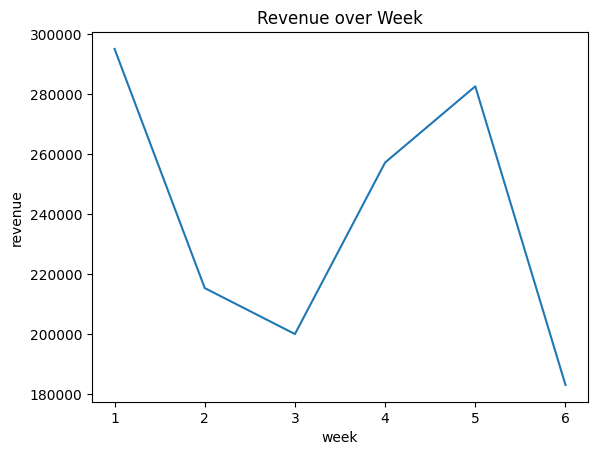

In [144]:
cx = df.groupby(['week'])['revenue'].sum()
print(cx)
sns.lineplot(data=df, x='week', y='revenue',estimator='sum',errorbar=None)
plt.title('Revenue over Week')
plt.show()

## Business Metrics  
The company's goal is to earn higher revenue using the best sales method. I would recommend that the company uses the average revenue amount of their preferred sales method as their metric.

Based on the data, Email + Call method has the highest sale revenue average (183 dollars). This is while Email (97 dollars) and Call (47 dollars) have lower average revenue. The business should monitor each method to see the performance on both total revenue and average revenue, as well as the growth rate.

The sales team should use its revenue average (183 dollars) as a baseline for whether a sale was more lucrative (above average) or not (below average).

Moreover, the sales team should recognize that sale averages overall and weekly are different since sale averages increase every week. Importantly, the first weeks could have lower revenue average amount than ($183), for instance.

## Recommendations
Based on the findings, the following recommendations can be made for the business:

Email method: Although the Email method generated the highest revenue in the first week, it decreased sharply over time. This might be because a
further email three weeks later. Therefore, the business should consider reduce the gap of each email, like send second email two week later, to maintain customers' interest and engagement.

Call method: The revenue generated by the Call method increased over time, but the growth was not significant. Plus, On average members of the team were on the phone for around thirty minutes per customer. It is a time-consuming method. The business should consider stop this method or reduce using this method for customers.

Email + Call method: This approach generated the highest revenue overall and had the strongest tendency to increase over time. The business should continue to use this approach and ensure that both the email and call components are well-coordinated and executed.

Overall, the findings suggest that adjustments are needed for the Email method to maintain customer interest. The Call method, although yielding revenue growth, is time-consuming and may require reconsideration. Conversely, the Email + Call method proves to be the most effective, warranting continued focus and optimization, because this method can significantly improve sales performance and overall success for the business.